<a href="https://colab.research.google.com/github/bibekebib/Tensorflow-basics/blob/main/Learning_Tensorflow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import tensorflow as tf
import gzip
import numpy as np

# The basics

In [3]:
labels_map = {
    0 : 'T-shirt',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : "Dress",
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle Boot',
}

In [4]:
(training_images, training_labels) , (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


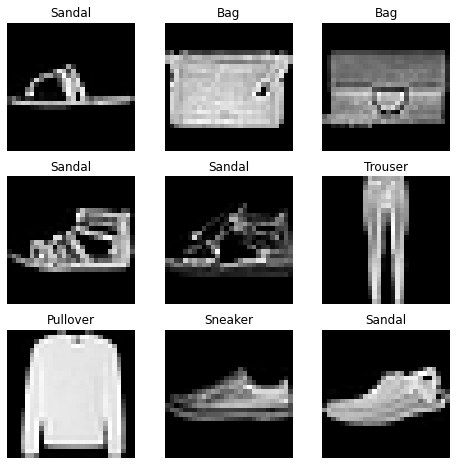

In [5]:
import random
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8,8))

col = 3
row = 3

for i in range(1, col*row+1):
  sample_idx = random.randint(0, len(training_images))
  image = training_images[sample_idx]
  label = training_labels[sample_idx]
  figure.add_subplot(row, col, i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(image.squeeze(), cmap='gray')
plt.show()

In [6]:
training_labels[2]

0

In [7]:
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((training_images, training_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [9]:
train_dataset = train_dataset.map(lambda image, label:(float(image)/255.0, label))
test_dataset = test_dataset.map(lambda image, label: (float(image)/255.0, label))

In [10]:
train_dataset.as_numpy_iterator().next()[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
batch_size=64
train_dataset = train_dataset.batch(batch_size).shuffle(500)
test_dataset = test_dataset.batch(batch_size).shuffle(500)

# Neural Network Architecture

In [12]:
class NeuralNetwork(tf.keras.Model):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.sequence = tf.keras.Sequential(
        [
         tf.keras.layers.Flatten(input_shape=(28,28)),
         tf.keras.layers.Dense(20, activation ='relu'),
         tf.keras.layers.Dense(10)
        ]
    )

  def call(self, x: tf.Tensor) -> tf.Tensor:
    y_prime = self.sequence(x)
    return y_prime

In [13]:
model = NeuralNetwork()
model.build((1,28,28))
model.summary()

Model: "neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 10)                15910     
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


# Training and Testing the Neural Network

In [14]:
from typing import Tuple

In [15]:
learning_rate = 0.1
batch_size=64
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model.compile(optimizer, loss_fn, metrics)

In [16]:
epochs = 5
print('\nFitting')
model.fit(train_dataset, epochs=epochs)


Fitting
Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 0.6285 - accuracy: 0.7776
Epoch 2/5
938/938 [==============================] - 3s 2ms/step - loss: 0.4652 - accuracy: 0.8334
Epoch 3/5
938/938 [==============================] - 3s 2ms/step - loss: 0.4248 - accuracy: 0.8484
Epoch 4/5
938/938 [==============================] - 3s 2ms/step - loss: 0.4033 - accuracy: 0.8554
Epoch 5/5
938/938 [==============================] - 3s 2ms/step - loss: 0.3852 - accuracy: 0.8609


In [17]:
print('\n Evaluating')
(test_loss, test_accuracy) = model.evaluate(test_dataset)


 Evaluating
157/157 [==============================] - 1s 1ms/step - loss: 0.4368 - accuracy: 0.8443


# Making a prediction

In [18]:
import requests
from PIL import Image

In [25]:
X = test_dataset.as_numpy_iterator().next()[0]


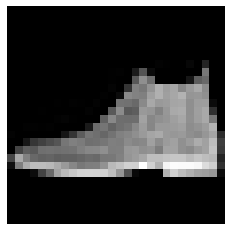

In [26]:
url = 'https://raw.githubusercontent.com/MicrosoftDocs/tensorflow-learning-path/main/intro-keras/predict-image.png'

with Image.open(requests.get(url, stream=True).raw) as image:
  X = np.asarray(image, dtype=np.float32).reshape((-1, 28, 28)) / 255.0

plt.figure()
plt.axis('off')
plt.imshow(X.squeeze(), cmap='gray')
plt.show()

In [27]:
predicted_vector = model.predict(X)
predicted_index = np.argmax(predicted_vector)
predicted_name = labels_map[predicted_index]

print(f'predicted class: {predicted_name}')

predicted class: Ankle Boot
